# Logistic Regression Demonstration

In this tutorial we will demonstrate how to use the `LogisticRegression` class in `scikit-learn` to perform logistic regression on a dataset. We will also demonstrate `predict_proba`. 

The data we have for this example is a set of 100 people who have smoked cigarettes for a number of years and the number of cigarettes they smoke per day. We also have a binary variable indicating whether or not they have lung cancer. The dataset is simulated, but can serve as a good example of how to use logistic regression.

NOTE1: See the 2a-logistic-example-smoking-data.ipynb notebook for more information about the data; how it was generated and how it is structured.

NOTE2: See the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for the `LogisticRegression` class for more information about the parameters used below.

## Import modules and set random seed

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(1)

## Load data from CSV file into dataframe

In [2]:
df = pd.read_csv('../data/logistic-example-smoking.csv') # you may need to edit this path depending on where you saved the data
df.head(3)

,kgs_smoked,cancer
0,9.785526,1
1,3.219303,0
2,5.757709,0


## Conduct an initial exploration of the data

Things are simple with this dataset. We have two features and one target variable. The features are both continuous and the target is binary. We can see that there are no missing values in the dataset.

The following code will:
* display the first 3 rows of the dataframe
* * check the dimensions of the dataframe
* check the data types of the columns
* check for missing values
* develop scatterplot of the data
* provide a statistical summary of the data


In [3]:
 # display the first 3 rows of the data
df.head(3)

,kgs_smoked,cancer
0,9.785526,1
1,3.219303,0
2,5.757709,0


In [4]:
# display the dimensions (shape) of the data
df.shape 

(100, 2)

In [5]:
# check the column data types
df.dtypes

kgs_smoked    float64
cancer          int64
dtype: object

In [6]:
# check for missing values
df.isnull().sum()

kgs_smoked    0
cancer        0
dtype: int64

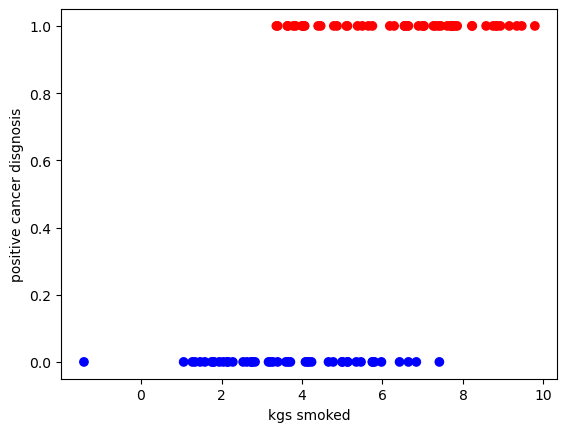

In [7]:
# scatter plot of the data

from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()
colors = np.array(["blue", "red"])
ax.scatter(df['kgs_smoked'], df['cancer'], c=colors[np.ravel(df['cancer'])])
ax.set_xlabel('kgs smoked')
ax.set_ylabel('positive cancer disgnosis')
plt.show()

In [8]:
# provide a statistical summary of the data
df.describe()

,kgs_smoked,cancer
count,100.000000,100.000000
mean,5.143015,0.530000
std,2.352217,0.501614
min,-1.417724,0.000000
25%,3.396137,0.000000
50%,5.117125,1.000000
75%,7.016571,1.000000
max,9.785526,1.000000


## Create a logistic model that best fits the data

To avoid overfitting, we will use a cross validation approach. As discussed last week, this involves randoming splitting the data into a training and test dataset. The ratio between the two is typically 70/30 or 80/20. We will use 80/20 here.

In [9]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split

X = df[['kgs_smoked']]
y = df['cancer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) # 80% training and 20% test

X_train

,kgs_smoked
2,5.757709
73,8.843667
97,4.018594
62,6.613892
19,7.389129
...,...
75,3.276313
9,2.537471
72,7.450907
12,4.658585


In [10]:
X_train

,kgs_smoked
2,5.757709
73,8.843667
97,4.018594
62,6.613892
19,7.389129
...,...
75,3.276313
9,2.537471
72,7.450907
12,4.658585


### Let's save the test and training data to csv files (we may want to use these later)

In [11]:
train = X_train.copy() # if you don't use copy(), then the original X_train will be modified when you add the y_train column
train['cancer'] = y_train
train.head(3)

,kgs_smoked,cancer
2,5.757709,0
73,8.843667,1
97,4.018594,1


In [12]:
train.to_csv('../data/logistic-example-smoking-train.csv', index=False)

In [13]:
test = X_test.copy() # if you don't use copy(), then the original X_test will be modified when you add the y_test column
test['cancer'] = y_test
test.head(3)

,kgs_smoked,cancer
80,2.167624,0
84,3.780981,1
33,3.654257,0


In [14]:
test.to_csv('../data/logistic-example-smoking-test.csv', index=False)

Fit a logistic regression model

In [15]:
X_train

,kgs_smoked
2,5.757709
73,8.843667
97,4.018594
62,6.613892
19,7.389129
...,...
75,3.276313
9,2.537471
72,7.450907
12,4.658585


In [16]:
log_reg = LogisticRegression().fit(X_train, np.ravel(y_train))

Add a column to the dataframe with the predicted values

In [17]:
df['predicted'] = log_reg.predict(X)
df.head(3)

,kgs_smoked,cancer,predicted
0,9.785526,1,1
1,3.219303,0,0
2,5.757709,0,1


Add a column of the probabilities of being a 1

In [18]:
df['pred_prob'] = log_reg.predict_proba(X)[:,1]
df.head(3)

,kgs_smoked,cancer,predicted,pred_prob
0,9.785526,1,1,0.984308
1,3.219303,0,0,0.247910
2,5.757709,0,1,0.714888


In [19]:
df['correct_prediction'] = df['cancer'] == df['predicted']
df.head(3)

,kgs_smoked,cancer,predicted,pred_prob,correct_prediction
0,9.785526,1,1,0.984308,True
1,3.219303,0,0,0.247910,True
2,5.757709,0,1,0.714888,False


Display the probabilities and the predicted values

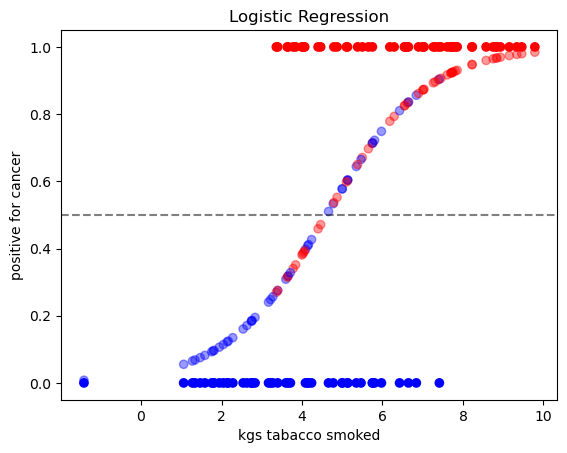

In [20]:
fig = plt.figure()
ax = fig.add_subplot()
#ax.scatter(X, y, c=y.iloc[:,0])
colors = np.array(["blue", "red"])
ax.scatter(X, y, c=colors[np.ravel(y)])
ax.scatter(X, df['pred_prob'], c=colors[np.ravel(y)], alpha=0.4)
plt.axhline(.5, color="black", label="cutoff", linestyle='--', alpha=.5)
ax.set_xlabel('kgs tabacco smoked')
ax.set_ylabel('positive for cancer')
ax.set_title('Logistic Regression')
plt.show()

Identify the coefficients and intercept.

In [21]:
log_reg.coef_
b0 = log_reg.intercept_[0]
b1 = log_reg.coef_[0][0]
r2 = log_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1")
print(f"R^2: {r2:.3f}")

Y = -3.68 + 0.80x1
R^2: 0.720


In [22]:
# What percentage of times did this model correctly predict the outcome?
df['correct_prediction'].sum() / df.shape[0]

0.72

## Save the model to disk

Once you train a model, you want to reused it in other notebooks or applications. You can save the model to disk using the `pickle` module.

In [23]:
import pickle

# save model
pickle.dump(log_reg, open('../data/logistic-model-smoking.pkl', "wb"))

# If you wish to load this model later, simply use pickle.load method
#loaded_model = pickle.load(open('logistic_model_example01.pkl', "rb"))

## Interpretation of the logistic regression model

### How to interpret the coefficients of a logistic regression model?

> NOTE: This section is advanced. I will not test you on this, I only offer this to those who are interested in learning more about the math behind logistic regression.

The b1 coefficient is the change in the log odds of being a 1 for a 1 unit increase in the predictor variable. 

The log odds function is the natural log of the odds. It's also known as the logit function.

> $\log \left(\frac{p}{1-p}\right)=\operatorname{logit}(p)$

Based on the results from our logistic regression above, we can see that the coefficient for `kgs smoked` is 0.27. This means that for a 1 unit increase in kgs smoked, the log odds of being a 1 increases by 0.0.27.
>NOTE: The $\beta_0$ and $\beta_1$ used here are from a specific dataset. If you experiment with other datasets, you will get different values for the coefficients and intercept than you see here. Whatever the new values, the following explanation will still apply.


$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=1.31+0.27x$

But how to we find the probability of being a 1? We can use the inverse logit function (aka, logistic function).

### Derive the predicted probability from the logistic model


The logit function is defined as

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)$

The logistic function, is defined as 

$\operatorname{logistic}(p)=\frac{1}{e^{\beta_0+\beta_1x}}$


When we use logistic regression (just as in regular regression), we are trying to find the best values for $\beta_0$ and $\beta_1$ that minimize the error between the predicted values and the actual values. But the interpretation of the coefficients is different.

$\operatorname{logit}(p)=\log \left(\frac{p}{1-p}\right)=\beta_0+\beta_1x$

### For illustration, take this relationship and derive the function for the probability of being a 1.

Exponentiate and take the multiplicative inverse of both sides, and we get the odds ratio.

$\frac{1-p}{p}=\frac{1}{e^{\beta_0+\beta_1x}}$

Partial out the fraction on the left-hand side of the equation and add one to both sides,

$\frac{1}{p}=1+\frac{1}{e^{\beta_0+\beta_1x}}$

Change 1 to a common denominator

$\frac{1}{p}=\frac{e^{\beta_0+\beta_1 x}+1}{e^{\beta_0+\beta_1 x}}$


Finally, take the multiplicative inverse again to obtain the formula for the probability P(cancer=1)

$p=\frac{e^{\beta_0+\beta_1 x}}{1+e^{\beta_0+\beta_1 x}}$


Now, let's apply our derived formular to the coefficients we obtained from the model. This will result in the probability of being a 1 for a given value of the predictor variable.

In [24]:
p_y_eq_1 = np.exp(b0 + b1 * X) / (1+ np.exp(b0 + b1 * X))
p_y_eq_1

,kgs_smoked
0,0.984308
1,0.247910
2,0.714888
3,0.397157
4,0.872273
...,...
95,0.649926
96,0.722212
97,0.384406
98,0.328154


Notice that these values are the same as the ones produced by the `predict_proba` method.

In [25]:
df.pred_prob

0     0.984308
1     0.247910
2     0.714888
3     0.397157
4     0.872273
        ...   
95    0.649926
96    0.722212
97    0.384406
98    0.328154
99    0.861614
Name: pred_prob, Length: 100, dtype: float64